## Purpose: random map example


Reconstruction of a map from randomly located measurements.
It uses artificially constructed data.

Demonstration: 
    1. 2d Data measured at random locations in a map
    2. Parameter fit
    3. Results in the form of a map

Author: Do Kester


import classes

In [1]:
import numpy as numpy
import math

from BayesicFitting import GaussModel
from BayesicFitting import PolySurfaceModel
from BayesicFitting import Kernel2dModel
from BayesicFitting import Gauss
from BayesicFitting import AmoebaFitter
from BayesicFitting import LevenbergMarquardtFitter
from BayesicFitting import ImageAssistant
from BayesicFitting import formatter as fmt
from BayesicFitting import plotFit
from BayesicFitting import Tools

%matplotlib osx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Define some constants to make a gaussian source on a constant background.

In [2]:
# define some constants
N = 71
b0 = 3.5            # amplitude of source
b1 = 30             # position
b2 = 45             # position
b3 = 13             # size of source
b4 = 20             # size of source
b5 = 0.3            # background

sig = 0.2

Make a map as a direct product of 2 one dimensional Gaussians. Add the background and noise.

In [3]:
numpy.random.seed( 123456 )
xdata = numpy.random.rand( 2*N, 2 ) * 70.0
x1 = ( xdata[:,0] - b1 ) / b3
y1 = numpy.exp( - x1 * x1 )
x2 = ( xdata[:,1] - b2 ) / b4
y2 = numpy.exp( - x2 * x2 )

y = b0 * y1 * y2 + b5
numpy.random.seed( 130105 )
y += sig * numpy.random.randn( 2*N )


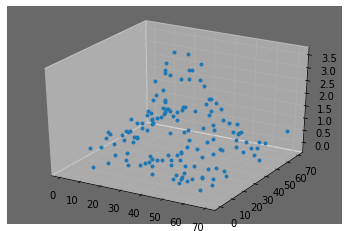

In [4]:
fig=plt.figure()
ax=fig.gca(projection='3d')
ax.set_facecolor('DimGray')
ax.plot( xdata[:,0], xdata[:,1], y ,'.')

Define the model as a 2-d KernelModel using a circular Gaussian kernel.
Add a constant 2d polynomial.

In [5]:
mdl = Kernel2dModel( kernel=Gauss(), shape='E' )
mdl += PolySurfaceModel( 0 )
print( mdl )
lo = [0, 0, 0, 0.01, 0.01, 0 ]
hi = [10, 70, 70, 70, 70, 10 ]
#mdl.setLimits( lo, hi )
par = [5.0,30.0,30.0,30.0,30.0,5.0]
mdl.parameters = par


2-d-Elliptic-Gauss: exp( -0.5 * x^2 ) +
PolySurface: f( x,y:p ) = p_5


Define the fitter: LevenbergMarquardtFitter.
The points, xdata, define where the quantity, y, is measured. Although xdata is 2 dimensional, it is not a map. 
The resulting yfit is also not a map.
However we can display the resulting fit as a map. We define a map, get the xpositions using ImageAssistant, calculate the result from the model, mdl, and convert that result back into a map, again with (the same) ImageAssistant.

xdata   (142, 2)
yfit    (142,)
mdlfit  (142,)


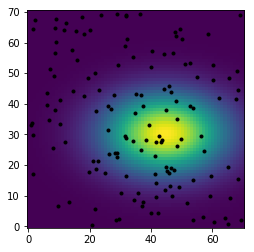

In [6]:
fitter = LevenbergMarquardtFitter( xdata, mdl )
print( "xdata  ", fitter.xdata.shape )
 
# find the parameters
param = fitter.fit( y )

yfit = fitter.yfit
print( "yfit   ", fitter.yfit.shape )
print( "mdlfit ", mdl( xdata ).shape )

map = numpy.zeros( (N, N), dtype=float )
ia = ImageAssistant()
xmap = ia.getIndices( map )
mapfit = ia.resizeData( mdl( xmap ) )

# plot the resulting map and overplot te measured positions.
plt.imshow( mapfit, origin="lower" )
plt.plot( xdata[:,0], xdata[:,1], 'k.' )
plt.show()  

In [7]:
print( "Parameters :", fmt( param, max=None ) )
print( "StDevs     :", fmt( fitter.stdevs, max=None ) )
print( "Chisq      :", fmt( fitter.chisq ) )
print( "Scale      :", fmt( fitter.scale ) )
print( "Evidence   :", fmt( fitter.getEvidence( limits=[-100,100] ) ) )
print( "Covar matrix :" )
print( fmt( fitter.covariance))

Parameters : [    3.639   30.307   44.485    9.014   13.831    0.275]
StDevs     : [    0.091    0.214    0.329    0.259    0.368    0.028]
Chisq      :     5.813
Scale      :     0.207
Evidence   :   -70.329
Covar matrix :
[[    0.008    0.001    0.003   -0.010   -0.015 ...]
 [    0.001    0.046    0.003   -0.006   -0.006 ...]
 [    0.003    0.003    0.108   -0.004    0.017 ...]
 [   -0.010   -0.006   -0.004    0.067    0.032 ...]
 [   -0.015   -0.006    0.017    0.032    0.136 ...] ...]


Exercise: Why are the resulting widths so much less consistent with the constants that were put in, than the other parameters.